# Development And Evaluation of Credit Risk Prediction Models Using Imbalanced Data and Ensemble Machine Learning

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
# np.random.seed(1234)

## Load data

In [2]:
data=pd.read_csv('loan_final313.csv')
print(data.shape)
data.head()

(887379, 30)


,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


## Understand the data

In [3]:
data.describe()

,id,year,final_d,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,loan_condition_cat,interest_rate,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment
count,8.873790e+05,887379.000000,8.873790e+05,887379.000000,887379.000000,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000
mean,3.246513e+07,2014.021761,1.047089e+06,6.050564,2.099130,7.502759e+04,1.196702,14755.264605,1.300045,1.000576,4.874621,1.475629,0.075987,13.246740,2.798403,18.157039,7558.826684,5757.706424,45.919243,436.717127
std,2.282734e+07,1.261741,4.555149e+04,3.507405,0.944839,6.469815e+04,0.442542,8435.455601,0.458278,0.023990,2.381156,0.499406,0.264977,4.381867,1.312599,17.190626,7871.243336,6625.441046,409.693874,244.186593
min,5.473400e+04,2007.000000,1.012008e+06,0.500000,1.000000,0.000000e+00,1.000000,500.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.320000,1.000000,0.000000,0.000000,0.000000,0.000000,15.670000
25%,9.206643e+06,2013.000000,1.012016e+06,3.000000,1.000000,4.500000e+04,1.000000,8000.000000,1.000000,1.000000,3.000000,1.000000,0.000000,9.990000,2.000000,11.910000,1914.590000,1200.570000,0.000000,260.705000
50%,3.443327e+07,2014.000000,1.012016e+06,6.050000,3.000000,6.500000e+04,1.000000,13000.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12.990000,3.000000,17.650000,4894.999117,3215.320000,0.000000,382.550000
75%,5.490814e+07,2015.000000,1.092015e+06,10.000000,3.000000,9.000000e+04,1.000000,20000.000000,2.000000,1.000000,6.000000,2.000000,0.000000,16.200000,4.000000,23.950000,10616.814230,8000.000000,0.000000,572.600000
max,6.861706e+07,2015.000000,1.122015e+06,10.000000,6.000000,9.500000e+06,3.000000,35000.000000,2.000000,2.000000,14.000000,2.000000,1.000000,28.990000,7.000000,9999.000000,57777.579870,35000.030000,33520.270000,1445.460000


In [4]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
id,887379
year,9
issue_d,103
final_d,98
emp_length_int,12
home_ownership,6
home_ownership_cat,6
income_category,3
annual_inc,45784
income_cat,3


In [5]:
data.duplicated().sum()

0

In [6]:
data.isna().any()

id                      False
year                    False
issue_d                 False
final_d                 False
emp_length_int          False
home_ownership          False
home_ownership_cat      False
income_category         False
annual_inc              False
income_cat              False
loan_amount             False
term                    False
term_cat                False
application_type        False
application_type_cat    False
purpose                 False
purpose_cat             False
interest_payments       False
interest_payment_cat    False
loan_condition          False
loan_condition_cat      False
interest_rate           False
grade                   False
grade_cat               False
dti                     False
total_pymnt             False
total_rec_prncp         False
recoveries              False
installment             False
region                  False
dtype: bool

In [7]:
data.dtypes

id                        int64
year                      int64
issue_d                  object
final_d                   int64
emp_length_int          float64
home_ownership           object
home_ownership_cat        int64
income_category          object
annual_inc                int64
income_cat                int64
loan_amount               int64
term                     object
term_cat                  int64
application_type         object
application_type_cat      int64
purpose                  object
purpose_cat               int64
interest_payments        object
interest_payment_cat      int64
loan_condition           object
loan_condition_cat        int64
interest_rate           float64
grade                    object
grade_cat                 int64
dti                     float64
total_pymnt             float64
total_rec_prncp         float64
recoveries              float64
installment             float64
region                   object
dtype: object

In [8]:
data['issue_d'] = pd.to_datetime(data['issue_d'])
data.head()

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,2011-01-12,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,2011-01-12,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,2011-01-12,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,2011-01-12,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,2011-01-12,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


In [9]:
data.dtypes

id                               int64
year                             int64
issue_d                 datetime64[ns]
final_d                          int64
emp_length_int                 float64
home_ownership                  object
home_ownership_cat               int64
income_category                 object
annual_inc                       int64
income_cat                       int64
loan_amount                      int64
term                            object
term_cat                         int64
application_type                object
application_type_cat             int64
purpose                         object
purpose_cat                      int64
interest_payments               object
interest_payment_cat             int64
loan_condition                  object
loan_condition_cat               int64
interest_rate                  float64
grade                           object
grade_cat                        int64
dti                            float64
total_pymnt              

## Understand categorical data

In [10]:
column_data_types = data.dtypes
categorical_columns = column_data_types[column_data_types == 'object'].index
data_cat = data[categorical_columns]
data_cat.head()

,home_ownership,income_category,term,application_type,purpose,interest_payments,loan_condition,grade,region
0,RENT,Low,36 months,INDIVIDUAL,credit_card,Low,Good Loan,B,munster
1,RENT,Low,60 months,INDIVIDUAL,car,High,Bad Loan,C,leinster
2,RENT,Low,36 months,INDIVIDUAL,small_business,High,Good Loan,C,cannught
3,RENT,Low,36 months,INDIVIDUAL,other,High,Good Loan,C,ulster
4,RENT,Low,60 months,INDIVIDUAL,other,Low,Good Loan,B,ulster


In [11]:
for column in data_cat.columns:
    distinct_values = data_cat[column].unique()
    print(f"Column '{column}' has {len(distinct_values)} distinct value(s):")
    print(distinct_values)
    print()

Column 'home_ownership' has 6 distinct value(s):
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

Column 'income_category' has 3 distinct value(s):
['Low' 'Medium' 'High']

Column 'term' has 2 distinct value(s):
[' 36 months' ' 60 months']

Column 'application_type' has 2 distinct value(s):
['INDIVIDUAL' 'JOINT']

Column 'purpose' has 14 distinct value(s):
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']

Column 'interest_payments' has 2 distinct value(s):
['Low' 'High']

Column 'loan_condition' has 2 distinct value(s):
['Good Loan' 'Bad Loan']

Column 'grade' has 7 distinct value(s):
['B' 'C' 'A' 'E' 'F' 'D' 'G']

Column 'region' has 5 distinct value(s):
['munster' 'leinster' 'cannught' 'ulster' 'Northern-Irl']



In [12]:
selected_columns = ['loan_condition', 'loan_condition_cat']
selected_df = data.loc[:, selected_columns]

# Display the resulting DataFrame
# print(selected_df)

column_name = 'loan_condition'
specific_value = 'Good Loan'

# Use boolean indexing to filter the DataFrame and select rows with the specific value
selected_rows = selected_df[selected_df[column_name] == specific_value]

# Display the resulting DataFrame
print(selected_rows)

       loan_condition  loan_condition_cat
0           Good Loan                   0
2           Good Loan                   0
3           Good Loan                   0
4           Good Loan                   0
5           Good Loan                   0
...               ...                 ...
887374      Good Loan                   0
887375      Good Loan                   0
887376      Good Loan                   0
887377      Good Loan                   0
887378      Good Loan                   0

[819950 rows x 2 columns]


## Correlation table

<AxesSubplot:>

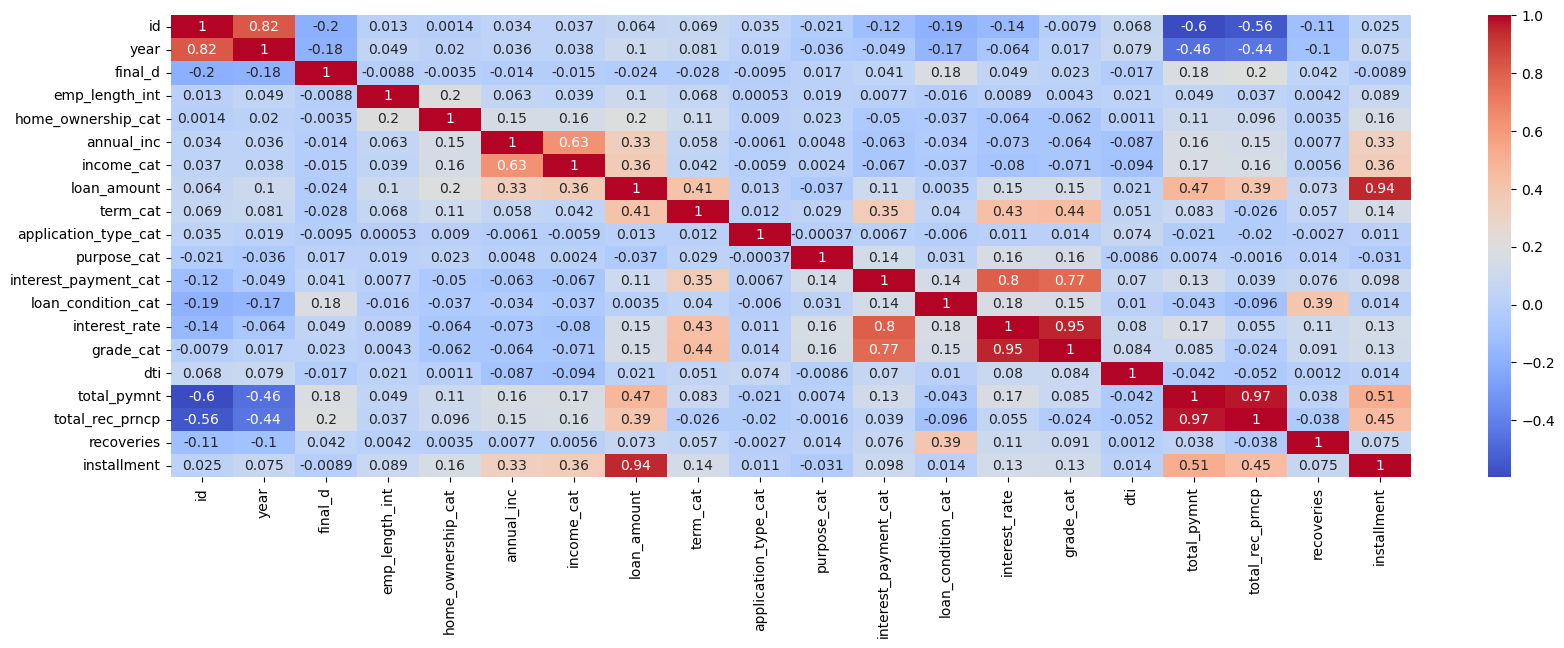

In [13]:
cormat = data.corr()
round(cormat,2)
plt.figure(figsize=(20,6))
sns.heatmap(cormat, annot=True, cbar=True, cmap='coolwarm')

## Individual variable assessment

In [14]:
df=data.copy()
print(df.shape)
df.head()

(887379, 30)


,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,2011-01-12,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,2011-01-12,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,2011-01-12,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,2011-01-12,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,2011-01-12,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


### Remove columns with no predictive value

In [15]:
df.drop('id', axis=1, inplace=True)
df.drop('year', axis=1, inplace=True)
df.drop('issue_d', axis=1, inplace=True)
df.drop('final_d', axis=1, inplace=True)

In [16]:
print(df.shape)
df.head()

(887379, 26)


,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,loan_amount,term,term_cat,application_type,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,10.0,RENT,1,Low,24000,1,5000,36 months,1,INDIVIDUAL,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,0.5,RENT,1,Low,30000,1,2500,60 months,2,INDIVIDUAL,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,10.0,RENT,1,Low,12252,1,2400,36 months,1,INDIVIDUAL,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,10.0,RENT,1,Low,49200,1,10000,36 months,1,INDIVIDUAL,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1.0,RENT,1,Low,80000,1,3000,60 months,2,INDIVIDUAL,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


### Scale 'emp_length'

In [17]:
scaler = MinMaxScaler()
df['emp_length_int'] = scaler.fit_transform(df['emp_length_int'].values.reshape(-1,1))

In [18]:
print(df.shape)
df.head()

(887379, 26)


,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,loan_amount,term,term_cat,application_type,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1.000000,RENT,1,Low,24000,1,5000,36 months,1,INDIVIDUAL,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,0.000000,RENT,1,Low,30000,1,2500,60 months,2,INDIVIDUAL,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1.000000,RENT,1,Low,12252,1,2400,36 months,1,INDIVIDUAL,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1.000000,RENT,1,Low,49200,1,10000,36 months,1,INDIVIDUAL,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,0.052632,RENT,1,Low,80000,1,3000,60 months,2,INDIVIDUAL,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


### Modify 'home_ownership' and remove minimal data

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

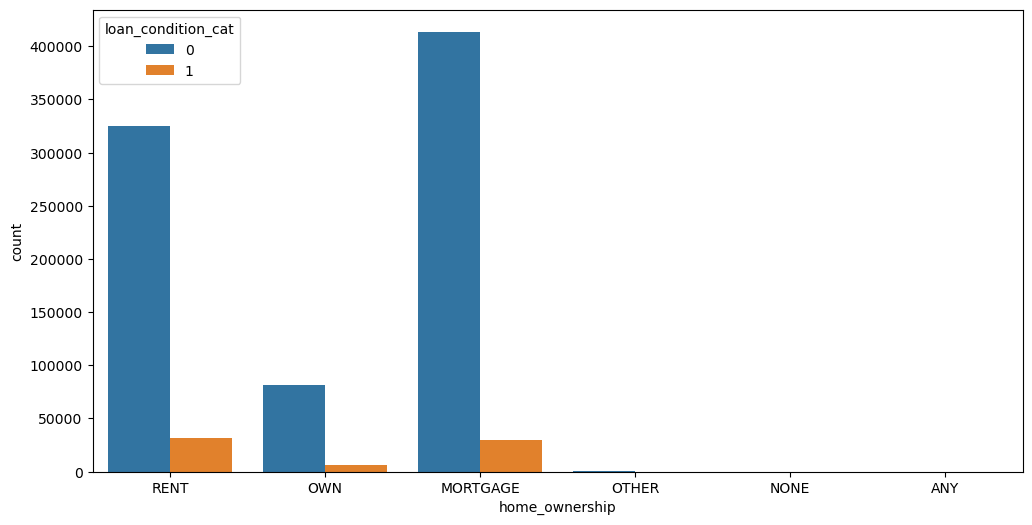

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x='home_ownership',data=df, hue='loan_condition_cat')

In [20]:
values_to_drop = ['NONE', 'ANY', 'OTHER']
df = df[~df['home_ownership'].isin(values_to_drop)]
df.drop('home_ownership', axis=1, inplace=True)

In [21]:
print(df.shape)
df.head()

(887144, 25)


,emp_length_int,home_ownership_cat,income_category,annual_inc,income_cat,loan_amount,term,term_cat,application_type,application_type_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1.000000,1,Low,24000,1,5000,36 months,1,INDIVIDUAL,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,0.000000,1,Low,30000,1,2500,60 months,2,INDIVIDUAL,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1.000000,1,Low,12252,1,2400,36 months,1,INDIVIDUAL,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1.000000,1,Low,49200,1,10000,36 months,1,INDIVIDUAL,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,0.052632,1,Low,80000,1,3000,60 months,2,INDIVIDUAL,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


### Remove 'income_category' and 'income_cat'

In [22]:
df.drop('income_category', axis=1, inplace=True)
df.drop('income_cat', axis=1, inplace=True)

In [23]:
print(df.shape)
df.head()

(887144, 23)


,emp_length_int,home_ownership_cat,annual_inc,loan_amount,term,term_cat,application_type,application_type_cat,purpose,purpose_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1.000000,1,24000,5000,36 months,1,INDIVIDUAL,1,credit_card,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,0.000000,1,30000,2500,60 months,2,INDIVIDUAL,1,car,2,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1.000000,1,12252,2400,36 months,1,INDIVIDUAL,1,small_business,3,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1.000000,1,49200,10000,36 months,1,INDIVIDUAL,1,other,4,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,0.052632,1,80000,3000,60 months,2,INDIVIDUAL,1,other,4,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


### Handle outliers in 'annual_inc' and perform scaling

<AxesSubplot:xlabel='annual_inc'>

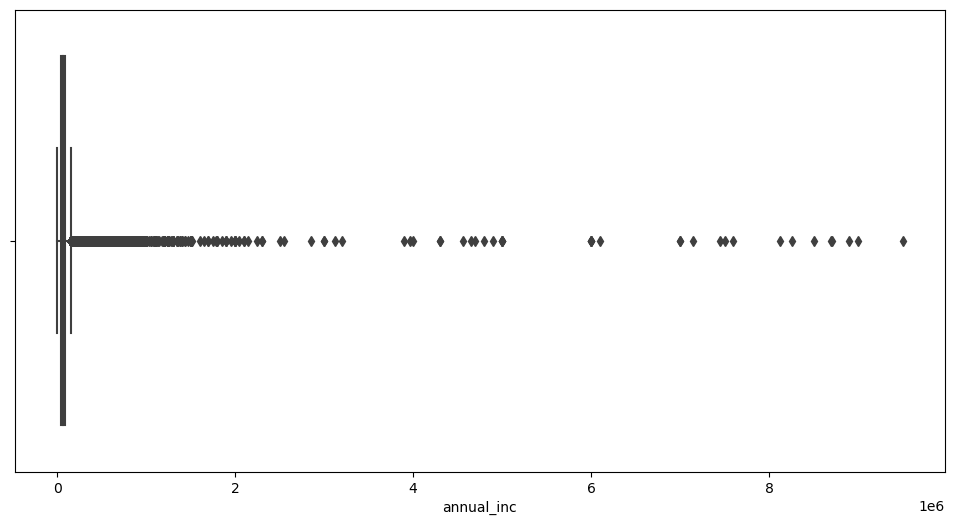

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['annual_inc'])

In [25]:
outliers = df[df['annual_inc'] > df['annual_inc'].quantile(0.99)].index
df.loc[outliers,'annual_inc'] = df['annual_inc'].quantile(0.99)
df['annual_inc'] = scaler.fit_transform(df['annual_inc'].values.reshape(-1,1))

<AxesSubplot:xlabel='annual_inc'>

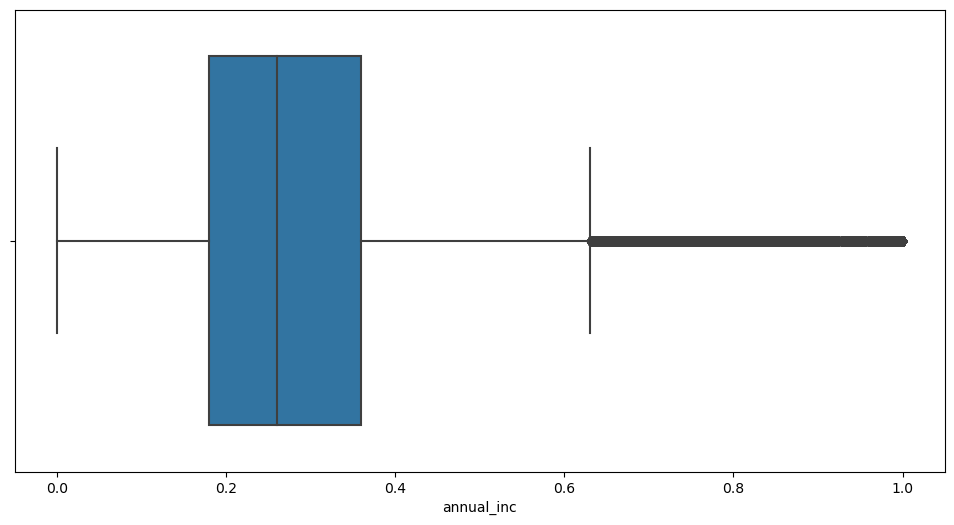

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['annual_inc'])

In [27]:
print(df.shape)
df.head()

(887144, 23)


,emp_length_int,home_ownership_cat,annual_inc,loan_amount,term,term_cat,application_type,application_type_cat,purpose,purpose_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1.000000,1,0.096000,5000,36 months,1,INDIVIDUAL,1,credit_card,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,0.000000,1,0.120000,2500,60 months,2,INDIVIDUAL,1,car,2,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1.000000,1,0.049008,2400,36 months,1,INDIVIDUAL,1,small_business,3,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1.000000,1,0.196800,10000,36 months,1,INDIVIDUAL,1,other,4,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,0.052632,1,0.320000,3000,60 months,2,INDIVIDUAL,1,other,4,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


### Scale 'loan_amount'

<AxesSubplot:xlabel='loan_amount'>

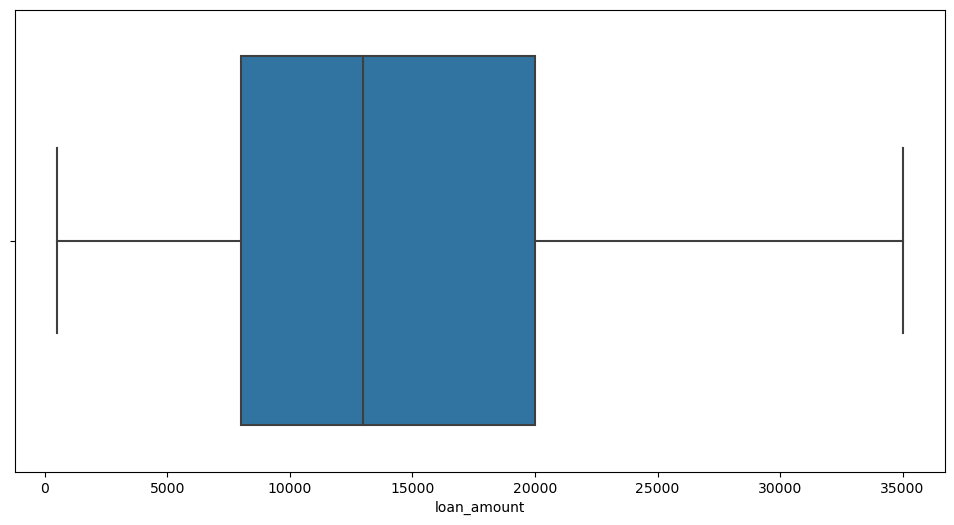

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['loan_amount'])

In [29]:
df['loan_amount'] = scaler.fit_transform(df['loan_amount'].values.reshape(-1,1))

In [30]:
print(df.shape)
df.head()

(887144, 23)


,emp_length_int,home_ownership_cat,annual_inc,loan_amount,term,term_cat,application_type,application_type_cat,purpose,purpose_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1.000000,1,0.096000,0.130435,36 months,1,INDIVIDUAL,1,credit_card,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,0.000000,1,0.120000,0.057971,60 months,2,INDIVIDUAL,1,car,2,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1.000000,1,0.049008,0.055072,36 months,1,INDIVIDUAL,1,small_business,3,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1.000000,1,0.196800,0.275362,36 months,1,INDIVIDUAL,1,other,4,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,0.052632,1,0.320000,0.072464,60 months,2,INDIVIDUAL,1,other,4,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


### Drop 'term' column

<AxesSubplot:xlabel='term', ylabel='count'>

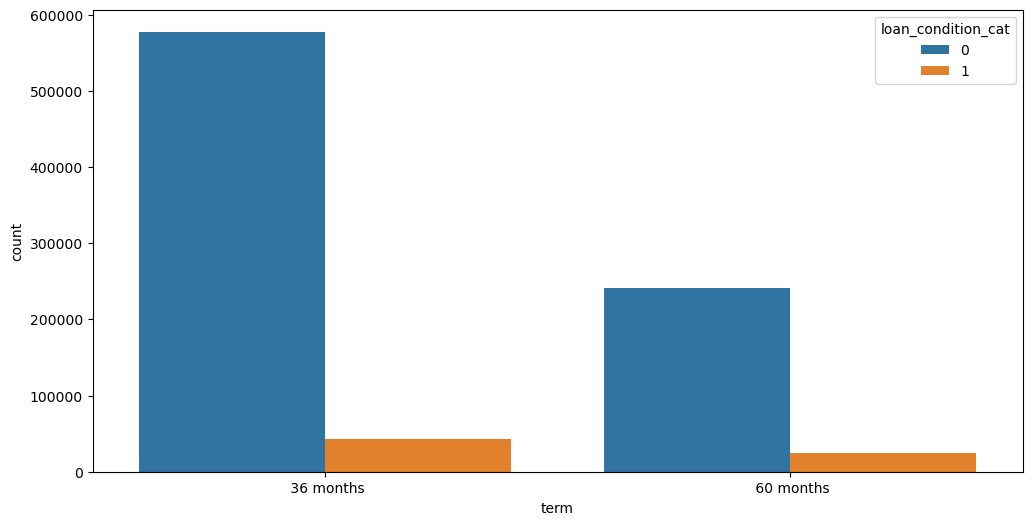

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(x='term',data=df, hue='loan_condition_cat')

In [32]:
df.drop('term', axis=1, inplace=True)

In [33]:
print(df.shape)
df.head()

(887144, 22)


,emp_length_int,home_ownership_cat,annual_inc,loan_amount,term_cat,application_type,application_type_cat,purpose,purpose_cat,interest_payments,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1.000000,1,0.096000,0.130435,1,INDIVIDUAL,1,credit_card,1,Low,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,0.000000,1,0.120000,0.057971,2,INDIVIDUAL,1,car,2,High,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1.000000,1,0.049008,0.055072,1,INDIVIDUAL,1,small_business,3,High,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1.000000,1,0.196800,0.275362,1,INDIVIDUAL,1,other,4,High,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,0.052632,1,0.320000,0.072464,2,INDIVIDUAL,1,other,4,Low,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


### Remove 'application_type' and 'application_type_cat'

<AxesSubplot:xlabel='application_type', ylabel='count'>

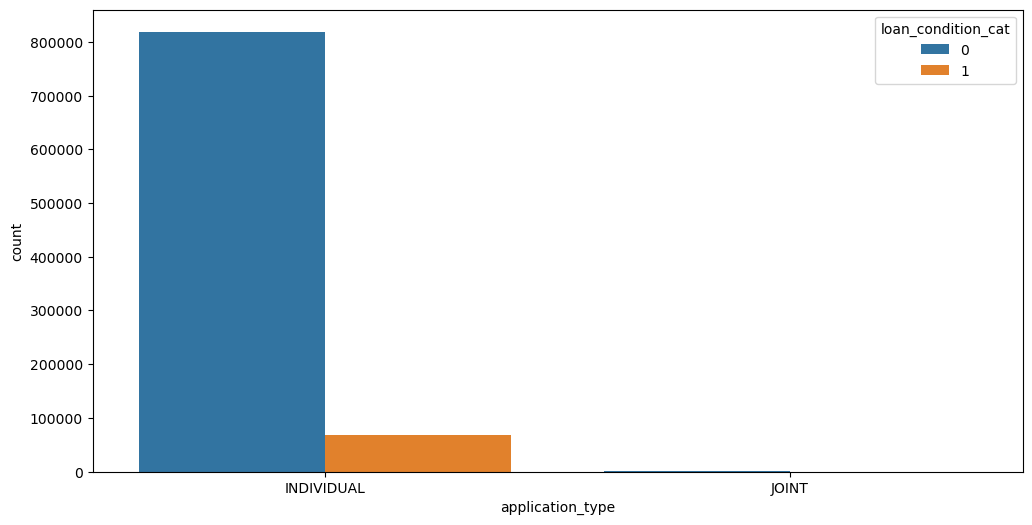

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(x='application_type',data=df, hue='loan_condition_cat')

In [35]:
df.drop('application_type', axis=1, inplace=True)
df.drop('application_type_cat', axis=1, inplace=True)

In [36]:
print(df.shape)
df.head()

(887144, 20)


,emp_length_int,home_ownership_cat,annual_inc,loan_amount,term_cat,purpose,purpose_cat,interest_payments,interest_payment_cat,loan_condition,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1.000000,1,0.096000,0.130435,1,credit_card,1,Low,1,Good Loan,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,0.000000,1,0.120000,0.057971,2,car,2,High,2,Bad Loan,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1.000000,1,0.049008,0.055072,1,small_business,3,High,2,Good Loan,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1.000000,1,0.196800,0.275362,1,other,4,High,2,Good Loan,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,0.052632,1,0.320000,0.072464,2,other,4,Low,1,Good Loan,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


### Modify 'purpose' column to keep majority class data

<AxesSubplot:xlabel='purpose', ylabel='count'>

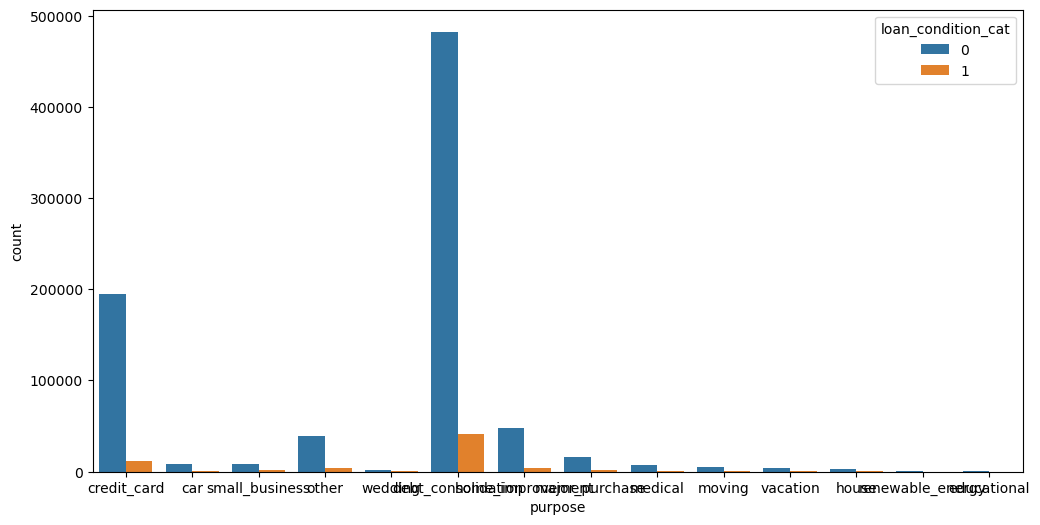

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(x='purpose',data=df, hue='loan_condition_cat')

In [38]:
value_counts = df['purpose'].value_counts()
value_counts

debt_consolidation    524137
credit_card           206111
home_improvement       51814
other                  42866
major_purchase         17269
small_business         10363
car                     8860
medical                 8535
moving                  5411
vacation                4736
house                   3704
wedding                 2346
renewable_energy         574
educational              418
Name: purpose, dtype: int64

In [39]:
# due to majority instances, keep only rows with 'debt_consolidation' and 'credit_card'
values_to_drop1 = ['home_improvement', 'other', 'major_purchase', 'small_business', 'car', 'medical', 'moving', 'vacation', 'house', 'wedding', 'renewable_energy', 'educational']
df = df[~df['purpose'].isin(values_to_drop1)]

In [40]:
distinct_purpose = df['purpose_cat'].unique()
distinct_purpose

array([1, 6], dtype=int64)

In [41]:
df['purpose_cat'] = df['purpose_cat'].replace(6, 2)

In [42]:
df.drop('purpose', axis=1, inplace=True)

In [43]:
print(df.shape)
df.head()

(730248, 19)


,emp_length_int,home_ownership_cat,annual_inc,loan_amount,term_cat,purpose_cat,interest_payments,interest_payment_cat,loan_condition,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1.000000,1,0.096000,0.130435,1,1,Low,1,Good Loan,0,10.65,B,2,27.65,5861.071414,5000.00,0.0,162.87,munster
6,0.789474,1,0.188016,0.188406,2,2,High,2,Good Loan,0,15.96,C,3,23.51,8136.840000,5110.85,0.0,170.08,leinster
10,0.473684,2,0.288000,0.173913,2,2,High,2,Good Loan,0,14.65,C,3,16.12,7677.520000,6500.00,0.0,153.45,munster
11,1.000000,2,0.300000,0.333333,1,2,Low,1,Good Loan,0,12.69,B,2,10.78,13943.080000,12000.00,0.0,402.54,ulster
12,0.000000,1,0.120000,0.246377,1,2,High,2,Bad Loan,1,13.49,C,3,10.08,2270.700000,1256.14,444.3,305.38,leinster


### 'Interest_payments' column dropped

<AxesSubplot:xlabel='interest_payments', ylabel='count'>

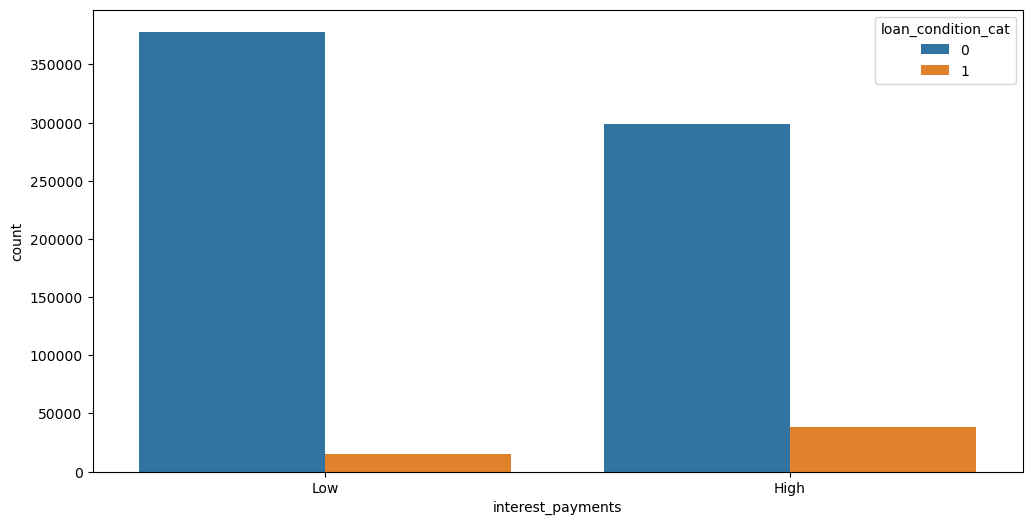

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(x='interest_payments',data=df, hue='loan_condition_cat')

In [45]:
df.drop('interest_payments', axis=1, inplace=True)

In [46]:
print(df.shape)
df.head()

(730248, 18)


,emp_length_int,home_ownership_cat,annual_inc,loan_amount,term_cat,purpose_cat,interest_payment_cat,loan_condition,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1.000000,1,0.096000,0.130435,1,1,1,Good Loan,0,10.65,B,2,27.65,5861.071414,5000.00,0.0,162.87,munster
6,0.789474,1,0.188016,0.188406,2,2,2,Good Loan,0,15.96,C,3,23.51,8136.840000,5110.85,0.0,170.08,leinster
10,0.473684,2,0.288000,0.173913,2,2,2,Good Loan,0,14.65,C,3,16.12,7677.520000,6500.00,0.0,153.45,munster
11,1.000000,2,0.300000,0.333333,1,2,1,Good Loan,0,12.69,B,2,10.78,13943.080000,12000.00,0.0,402.54,ulster
12,0.000000,1,0.120000,0.246377,1,2,2,Bad Loan,1,13.49,C,3,10.08,2270.700000,1256.14,444.3,305.38,leinster


### 'loan_condition' column dropped

In [47]:
df.drop('loan_condition', axis=1, inplace=True)
print(df.shape)
df.head()

(730248, 17)


,emp_length_int,home_ownership_cat,annual_inc,loan_amount,term_cat,purpose_cat,interest_payment_cat,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1.000000,1,0.096000,0.130435,1,1,1,0,10.65,B,2,27.65,5861.071414,5000.00,0.0,162.87,munster
6,0.789474,1,0.188016,0.188406,2,2,2,0,15.96,C,3,23.51,8136.840000,5110.85,0.0,170.08,leinster
10,0.473684,2,0.288000,0.173913,2,2,2,0,14.65,C,3,16.12,7677.520000,6500.00,0.0,153.45,munster
11,1.000000,2,0.300000,0.333333,1,2,1,0,12.69,B,2,10.78,13943.080000,12000.00,0.0,402.54,ulster
12,0.000000,1,0.120000,0.246377,1,2,2,1,13.49,C,3,10.08,2270.700000,1256.14,444.3,305.38,leinster


### Handle outliers in 'interest_rate' and perform scaling

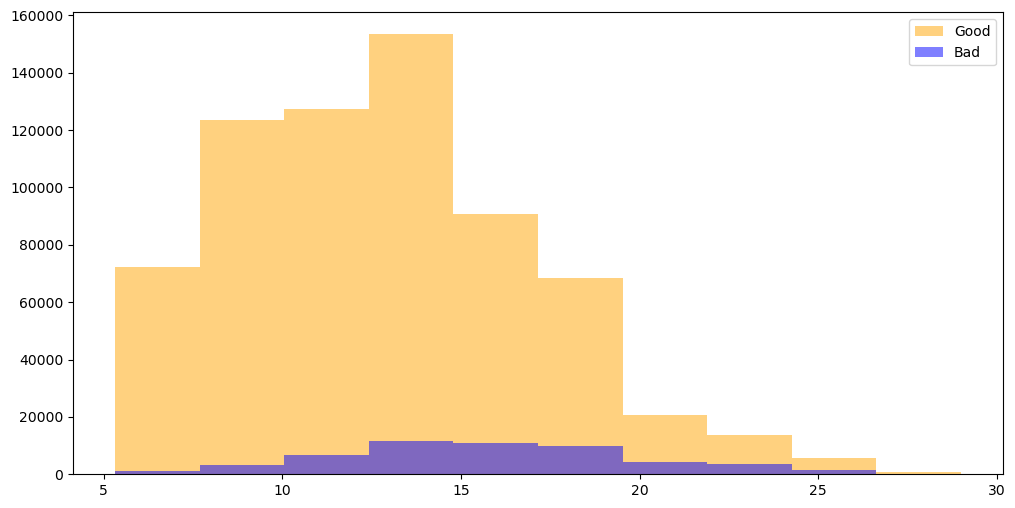

In [48]:
plt.figure(figsize=(12,6))
plt.hist(df[df['loan_condition_cat']==0]['interest_rate'],color='orange',alpha=0.5,label='Good')
plt.hist(df[df['loan_condition_cat']==1]['interest_rate'],color='blue',alpha=0.5,label='Bad')

plt.legend()

<AxesSubplot:xlabel='interest_rate'>

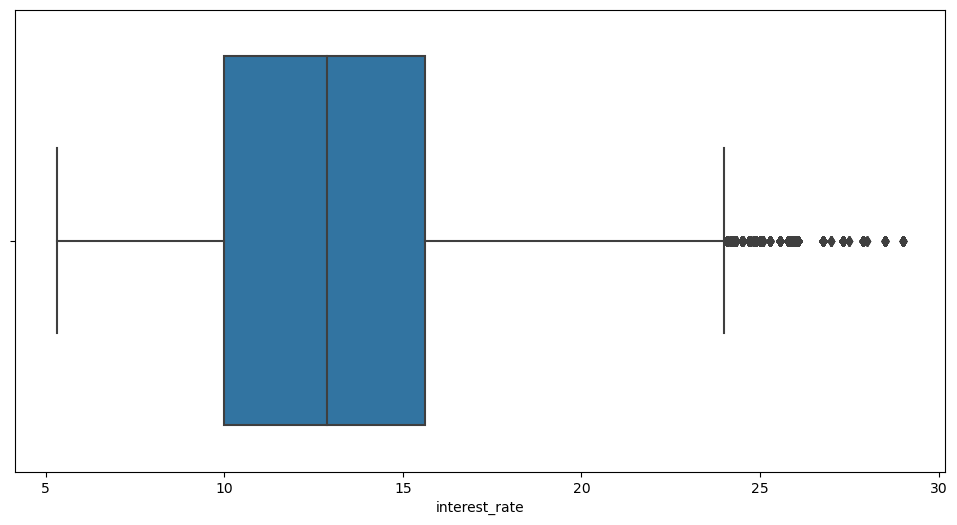

In [49]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['interest_rate'])

In [50]:
outliers = df[df['interest_rate'] > df['interest_rate'].quantile(.99)].index
df.loc[outliers,'interest_rate'] = df['interest_rate'].quantile(.99)
df['interest_rate'] = scaler.fit_transform(df['interest_rate'].values.reshape(-1,1))

<AxesSubplot:xlabel='interest_rate'>

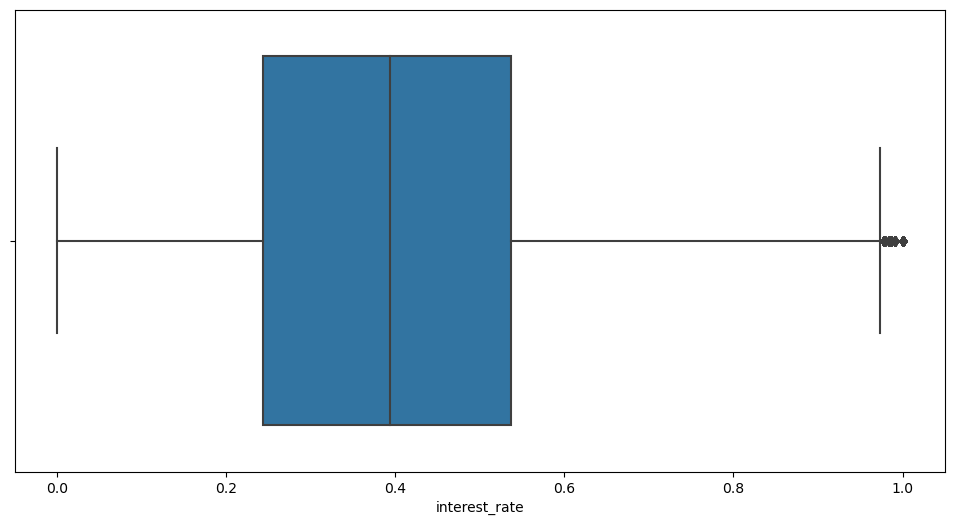

In [51]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['interest_rate'])

In [52]:
print(df.shape)
df.head()

(730248, 17)


,emp_length_int,home_ownership_cat,annual_inc,loan_amount,term_cat,purpose_cat,interest_payment_cat,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1.000000,1,0.096000,0.130435,1,1,1,0,0.277894,B,2,27.65,5861.071414,5000.00,0.0,162.87,munster
6,0.789474,1,0.188016,0.188406,2,2,2,0,0.554745,C,3,23.51,8136.840000,5110.85,0.0,170.08,leinster
10,0.473684,2,0.288000,0.173913,2,2,2,0,0.486444,C,3,16.12,7677.520000,6500.00,0.0,153.45,munster
11,1.000000,2,0.300000,0.333333,1,2,1,0,0.384254,B,2,10.78,13943.080000,12000.00,0.0,402.54,ulster
12,0.000000,1,0.120000,0.246377,1,2,2,1,0.425965,C,3,10.08,2270.700000,1256.14,444.3,305.38,leinster


### Drop 'grade' and 'grade_cat' column

<AxesSubplot:xlabel='grade', ylabel='count'>

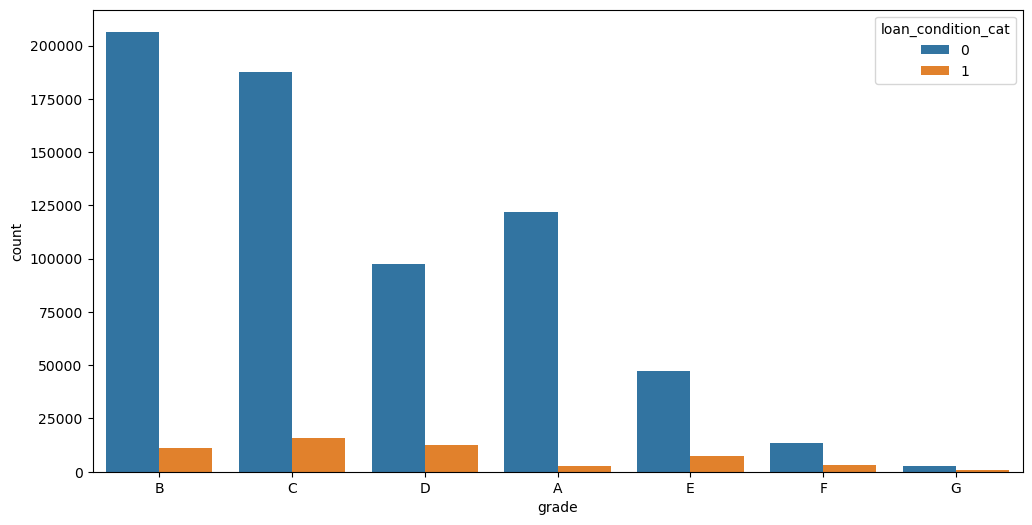

In [53]:
plt.figure(figsize=(12,6))
sns.countplot(x='grade',data=df, hue='loan_condition_cat')

In [54]:
df.drop('grade', axis=1, inplace=True)
df.drop('grade_cat', axis=1, inplace=True)

In [55]:
print(df.shape)
df.head()

(730248, 15)


,emp_length_int,home_ownership_cat,annual_inc,loan_amount,term_cat,purpose_cat,interest_payment_cat,loan_condition_cat,interest_rate,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1.000000,1,0.096000,0.130435,1,1,1,0,0.277894,27.65,5861.071414,5000.00,0.0,162.87,munster
6,0.789474,1,0.188016,0.188406,2,2,2,0,0.554745,23.51,8136.840000,5110.85,0.0,170.08,leinster
10,0.473684,2,0.288000,0.173913,2,2,2,0,0.486444,16.12,7677.520000,6500.00,0.0,153.45,munster
11,1.000000,2,0.300000,0.333333,1,2,1,0,0.384254,10.78,13943.080000,12000.00,0.0,402.54,ulster
12,0.000000,1,0.120000,0.246377,1,2,2,1,0.425965,10.08,2270.700000,1256.14,444.3,305.38,leinster


### Handle outliers in 'dti' and perform scaling

<AxesSubplot:xlabel='dti'>

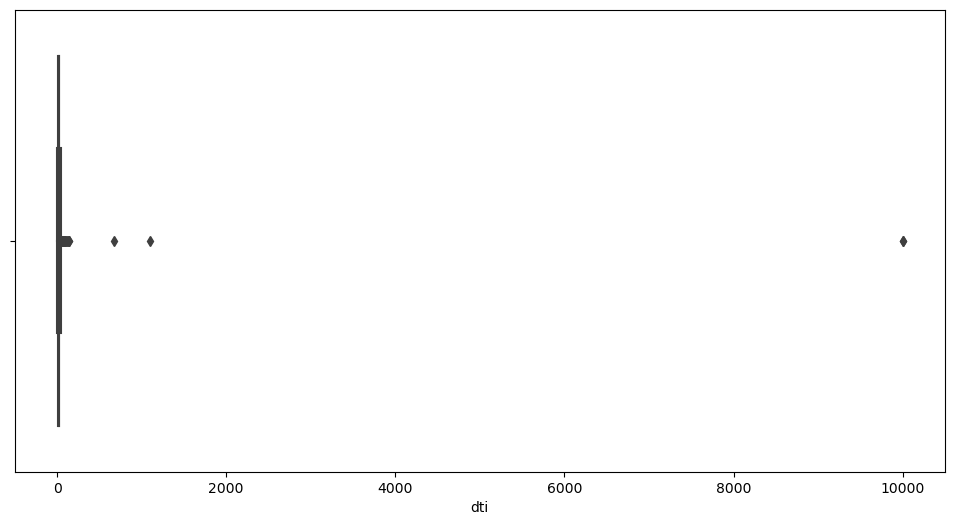

In [56]:
# dti
plt.figure(figsize=(12,6))
sns.boxplot(x=df['dti'])

In [57]:
outliers = df[df['dti'] > df['dti'].quantile(.99)].index
df.loc[outliers,'dti'] = df['dti'].quantile(.99)
df['dti'] = scaler.fit_transform(df['dti'].values.reshape(-1,1))

<AxesSubplot:xlabel='dti'>

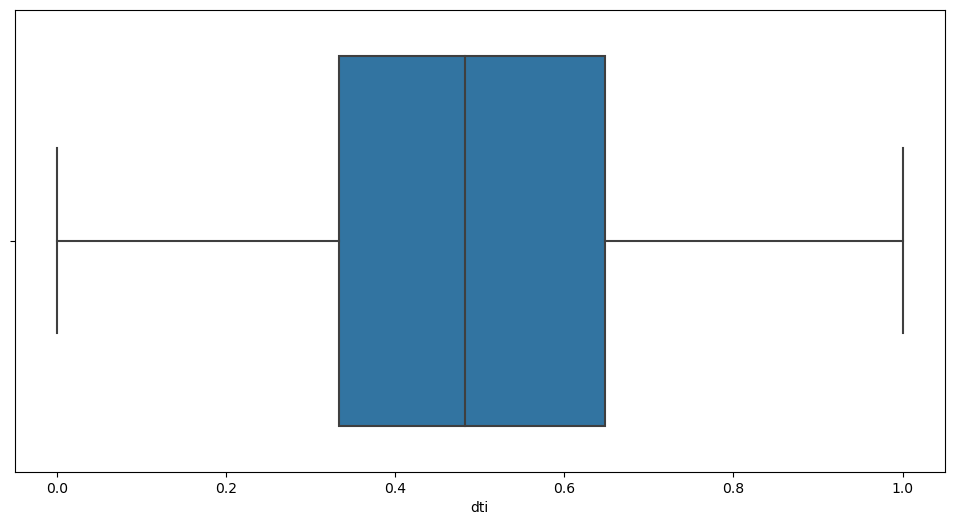

In [58]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['dti'])

In [59]:
print(df.shape)
df.head()

(730248, 15)


,emp_length_int,home_ownership_cat,annual_inc,loan_amount,term_cat,purpose_cat,interest_payment_cat,loan_condition_cat,interest_rate,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1.000000,1,0.096000,0.130435,1,1,1,0,0.277894,0.735372,5861.071414,5000.00,0.0,162.87,munster
6,0.789474,1,0.188016,0.188406,2,2,2,0,0.554745,0.625266,8136.840000,5110.85,0.0,170.08,leinster
10,0.473684,2,0.288000,0.173913,2,2,2,0,0.486444,0.428723,7677.520000,6500.00,0.0,153.45,munster
11,1.000000,2,0.300000,0.333333,1,2,1,0,0.384254,0.286702,13943.080000,12000.00,0.0,402.54,ulster
12,0.000000,1,0.120000,0.246377,1,2,2,1,0.425965,0.268085,2270.700000,1256.14,444.3,305.38,leinster


### remove remaining columns with no predictive value

In [60]:
df.drop('total_pymnt', axis=1, inplace=True)
df.drop('total_rec_prncp', axis=1, inplace=True)
df.drop('recoveries', axis=1, inplace=True)
df.drop('installment', axis=1, inplace=True)
df.drop('region', axis=1, inplace=True)

In [61]:
print(df.shape)
df.head()

(730248, 10)


,emp_length_int,home_ownership_cat,annual_inc,loan_amount,term_cat,purpose_cat,interest_payment_cat,loan_condition_cat,interest_rate,dti
0,1.000000,1,0.096000,0.130435,1,1,1,0,0.277894,0.735372
6,0.789474,1,0.188016,0.188406,2,2,2,0,0.554745,0.625266
10,0.473684,2,0.288000,0.173913,2,2,2,0,0.486444,0.428723
11,1.000000,2,0.300000,0.333333,1,2,1,0,0.384254,0.286702
12,0.000000,1,0.120000,0.246377,1,2,2,1,0.425965,0.268085


## Data Imbalance

In [62]:
df2=df.copy()

In [63]:
value_counts = df2['loan_condition_cat'].value_counts()
value_counts

0    676916
1     53332
Name: loan_condition_cat, dtype: int64

In [64]:
X = df2.drop('loan_condition_cat', axis=1)
y = df2['loan_condition_cat']

In [65]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [66]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

### SMOTE Sampling

In [67]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

df_smote = pd.concat([pd.DataFrame(X_smote), pd.Series(y_smote, name='loan_condition')], axis=1)
df_smote.head()

,emp_length_int,home_ownership_cat,annual_inc,loan_amount,term_cat,purpose_cat,interest_payment_cat,interest_rate,dti,loan_condition
0,1.000000,1,0.096000,0.130435,1,1,1,0.277894,0.735372,0
1,0.789474,1,0.188016,0.188406,2,2,2,0.554745,0.625266,0
2,0.473684,2,0.288000,0.173913,2,2,2,0.486444,0.428723,0
3,1.000000,2,0.300000,0.333333,1,2,1,0.384254,0.286702,0
4,0.000000,1,0.120000,0.246377,1,2,2,0.425965,0.268085,1


In [68]:
df_smote.shape

(1353832, 10)

In [69]:
value_counts = df_smote['loan_condition'].value_counts()
value_counts

0    676916
1    676916
Name: loan_condition, dtype: int64

### ADASYN Sampling

In [70]:
adasyn = ADASYN(sampling_strategy='minority', random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

df_adasyn = pd.concat([pd.DataFrame(X_adasyn), pd.Series(y_adasyn, name='loan_condition')], axis=1)
df_adasyn.head()

,emp_length_int,home_ownership_cat,annual_inc,loan_amount,term_cat,purpose_cat,interest_payment_cat,interest_rate,dti,loan_condition
0,1.000000,1,0.096000,0.130435,1,1,1,0.277894,0.735372,0
1,0.789474,1,0.188016,0.188406,2,2,2,0.554745,0.625266,0
2,0.473684,2,0.288000,0.173913,2,2,2,0.486444,0.428723,0
3,1.000000,2,0.300000,0.333333,1,2,1,0.384254,0.286702,0
4,0.000000,1,0.120000,0.246377,1,2,2,0.425965,0.268085,1


In [71]:
df_adasyn.shape

(1357528, 10)

In [72]:
value_counts = df_adasyn['loan_condition'].value_counts()
value_counts

1    680612
0    676916
Name: loan_condition, dtype: int64

## Machine Learning

In [73]:
# !pip install lightgbm
import lightgbm as lgb

# !pip install xgboost
import xgboost as xgb

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# !pip3 install catboost
from catboost import CatBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold

### Machine learning SMOTE resampled data

In [74]:
X1_smote = df_smote.drop('loan_condition', axis=1)
y1_smote = df_smote['loan_condition']

In [75]:
#test size 0.2
xs_train, xs_test, ys_train, ys_test = train_test_split(X1_smote, y1_smote, test_size=0.2, random_state=40 )

#### GBDT with SMOTE

In [76]:
gbdts_model = GradientBoostingClassifier()
gbdts_model.fit(xs_train, ys_train)

# Make predictions
gbdts_pred = gbdts_model.predict(xs_test)

# Evaluate accuracy
gbdts_accuracy = accuracy_score(ys_test, gbdts_pred)
print(f"Accuracy: {gbdts_accuracy:.8f}")

Accuracy: 0.76304720


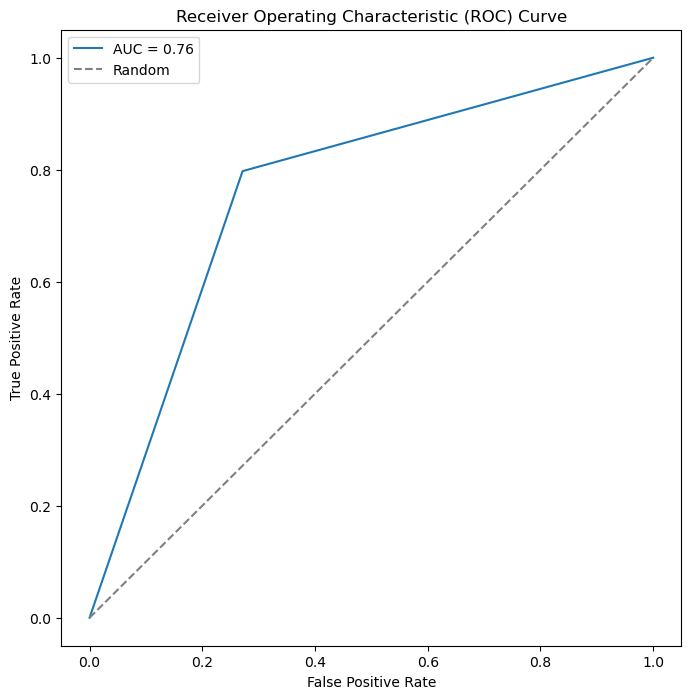

In [77]:
# check auc score and curve
auc = roc_auc_score(ys_test, gbdts_pred)
fpr, tpr, thresholds = roc_curve(ys_test, gbdts_pred)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [78]:
conf_matrix = confusion_matrix(ys_test, gbdts_pred)

# Extract values from confusion matrix
true_positive = conf_matrix[1, 1]
false_positive = conf_matrix[0, 1]
true_negative = conf_matrix[0, 0]
false_negative = conf_matrix[1, 0]

# Calculate sensitivity and specificity
sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)


print("Confusion Matrix:")
print(conf_matrix)
print("\nSensitivity (True Positive Rate): {:.8f}".format(sensitivity))
print("Specificity (True Negative Rate): {:.8f}".format(specificity))

Confusion Matrix:
[[ 98565  36723]
 [ 27436 108043]]

Sensitivity (True Positive Rate): 0.79748891
Specificity (True Negative Rate): 0.72855686


In [79]:
# to check if train score higher than test score above (Holdout validation)
gbdts_pred_train = gbdts_model.predict(xs_train)
gbdts_accuracy_train = accuracy_score(ys_train, gbdts_pred_train)
print(f"Accuracy: {gbdts_accuracy_train:.8f}")

Accuracy: 0.76284988


In [80]:
num_folds = 5

cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_results = cross_val_score(gbdts_model, X1_smote, y1_smote, cv=cv, scoring='accuracy')

# Print the results
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean():.8f}')
print(f'Standard Deviation: {cross_val_results.std():.2f}')

Cross-Validation Results (Accuracy): [0.76323555 0.76091252 0.76097073 0.75776131 0.75900593]
Mean Accuracy: 0.76037721
Standard Deviation: 0.00


#### LightGBM with SMOTE

In [81]:
lgbs_model = lgb.LGBMClassifier()
lgbs_model.fit(xs_train, ys_train)

# Make predictions
lgbms_pred = lgbs_model.predict(xs_test)

# Evaluate accuracy
lgbms_accuracy = accuracy_score(ys_test, lgbms_pred)
print(f"Accuracy: {lgbms_accuracy:.8f}")

[LightGBM] [Info] Number of positive: 541437, number of negative: 541628
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.052701 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1288
[LightGBM] [Info] Number of data points in the train set: 1083065, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499912 -> initscore=-0.000353
[LightGBM] [Info] Start training from score -0.000353
Accuracy: 0.86773868


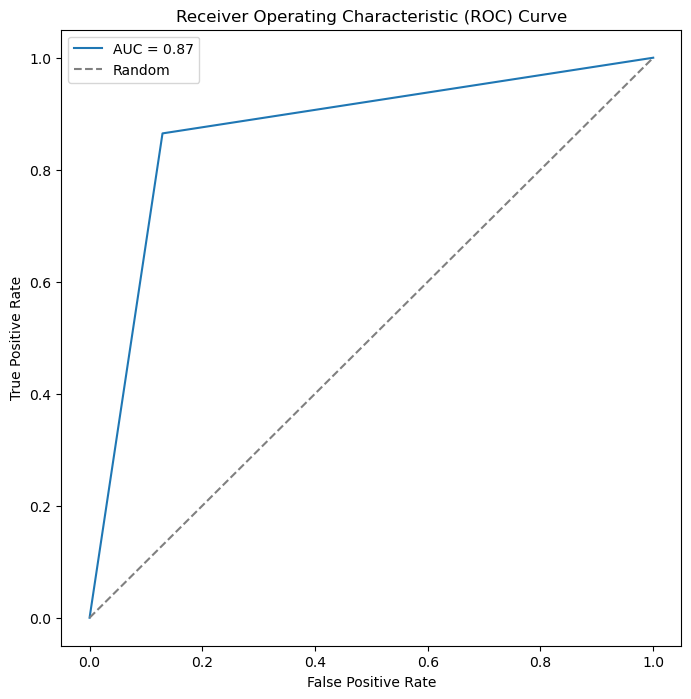

In [82]:
# check auc score and curve
auc = roc_auc_score(ys_test, lgbms_pred)
fpr, tpr, thresholds = roc_curve(ys_test, lgbms_pred)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [83]:
conf_matrix = confusion_matrix(ys_test, lgbms_pred)

# Extract values from confusion matrix
true_positive = conf_matrix[1, 1]
false_positive = conf_matrix[0, 1]
true_negative = conf_matrix[0, 0]
false_negative = conf_matrix[1, 0]

# Calculate sensitivity and specificity
sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)


print("Confusion Matrix:")
print(conf_matrix)
print("\nSensitivity (True Positive Rate): {:.8f}".format(sensitivity))
print("Specificity (True Negative Rate): {:.8f}".format(specificity))

Confusion Matrix:
[[117784  17504]
 [ 18308 117171]]

Sensitivity (True Positive Rate): 0.86486467
Specificity (True Negative Rate): 0.87061676


In [84]:
# to check if train score higher than test score above (Holdout validation)
lgbs_pred_train = lgbs_model.predict(xs_train)
lgbs_accuracy_train = accuracy_score(ys_train, lgbs_pred_train)
print(f"Accuracy: {lgbs_accuracy_train:.8f}")

Accuracy: 0.86762198


In [85]:
num_folds = 5

cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_results = cross_val_score(lgbs_model, X1_smote, y1_smote, cv=cv, scoring='accuracy')

# Print the results
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean():.8f}')
print(f'Standard Deviation: {cross_val_results.std():.2f}')

[LightGBM] [Info] Number of positive: 541533, number of negative: 541532
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1288
[LightGBM] [Info] Number of data points in the train set: 1083065, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000002
[LightGBM] [Info] Start training from score 0.000002
[LightGBM] [Info] Number of positive: 541532, number of negative: 541533
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1288
[LightGBM] [Info] Number of data points in the train set: 1083065, number of used features: 9
[LightGBM] [In

#### XGBoost with SMOTE

In [86]:
xgbs_model = xgb.XGBClassifier()
xgbs_model.fit(xs_train, ys_train)

# Make predictions
xgbs_pred = xgbs_model.predict(xs_test)

# Evaluate accuracy
xgbs_accuracy = accuracy_score(ys_test, xgbs_pred)
print(f"Accuracy: {xgbs_accuracy:.8f}")

Accuracy: 0.85106383


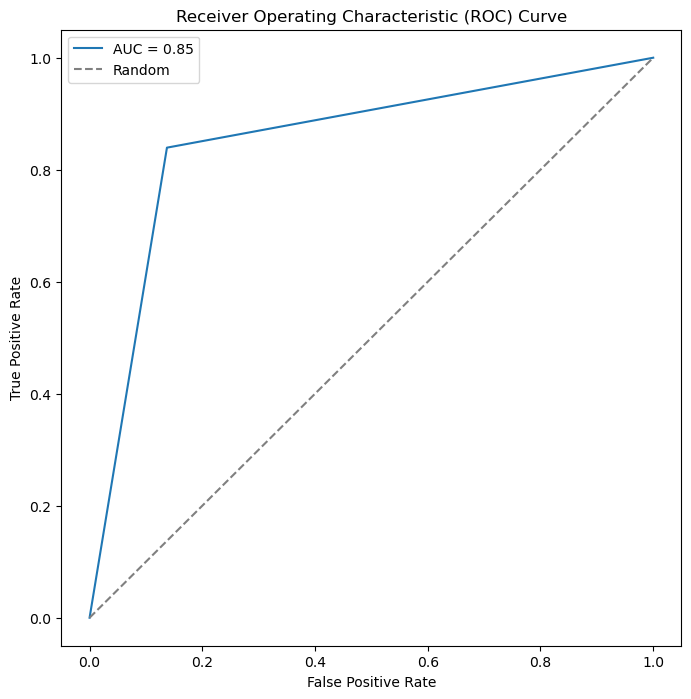

In [87]:
# check auc score and curve
auc = roc_auc_score(ys_test, xgbs_pred)
fpr, tpr, thresholds = roc_curve(ys_test, xgbs_pred)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [88]:
conf_matrix = confusion_matrix(ys_test, xgbs_pred)

# Extract values from confusion matrix
true_positive = conf_matrix[1, 1]
false_positive = conf_matrix[0, 1]
true_negative = conf_matrix[0, 0]
false_negative = conf_matrix[1, 0]

# Calculate sensitivity and specificity
sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)


print("Confusion Matrix:")
print(conf_matrix)
print("\nSensitivity (True Positive Rate): {:.8f}".format(sensitivity))
print("Specificity (True Negative Rate): {:.8f}".format(specificity))

Confusion Matrix:
[[116718  18570]
 [ 21757 113722]]

Sensitivity (True Positive Rate): 0.83940685
Specificity (True Negative Rate): 0.86273727


In [89]:
# to check if train score higher than test score above (Holdout validation)
xgbs_pred_train = xgbs_model.predict(xs_train)
xgbs_accuracy_train = accuracy_score(ys_train, xgbs_pred_train)
print(f"Accuracy: {xgbs_accuracy_train:.8f}")

Accuracy: 0.85328766


In [90]:
num_folds = 5

cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_results = cross_val_score(xgbs_model, X1_smote, y1_smote, cv=cv, scoring='accuracy')

# Print the results
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean():.8f}')
print(f'Standard Deviation: {cross_val_results.std():.2f}')

Cross-Validation Results (Accuracy): [0.85091979 0.85019592 0.85038742 0.85348604 0.84955644]
Mean Accuracy: 0.85090912
Standard Deviation: 0.00


#### CatBoost with SMOTE

In [91]:
cats_model = CatBoostClassifier()
cats_model.fit(xs_train, ys_train)

# Make predictions
cats_pred = cats_model.predict(xs_test)

# Evaluate accuracy
cats_accuracy = accuracy_score(ys_test, cats_pred)
print(f"Accuracy: {cats_accuracy:.8f}")

Learning rate set to 0.203578
0:	learn: 0.6646075	total: 328ms	remaining: 5m 27s
1:	learn: 0.6438889	total: 441ms	remaining: 3m 40s
2:	learn: 0.6311849	total: 536ms	remaining: 2m 58s
3:	learn: 0.6198711	total: 636ms	remaining: 2m 38s
4:	learn: 0.6117100	total: 747ms	remaining: 2m 28s
5:	learn: 0.6045497	total: 837ms	remaining: 2m 18s
6:	learn: 0.5975167	total: 919ms	remaining: 2m 10s
7:	learn: 0.5930011	total: 1.02s	remaining: 2m 6s
8:	learn: 0.5877614	total: 1.12s	remaining: 2m 3s
9:	learn: 0.5814351	total: 1.21s	remaining: 1m 59s
10:	learn: 0.5689505	total: 1.3s	remaining: 1m 57s
11:	learn: 0.5668399	total: 1.39s	remaining: 1m 54s
12:	learn: 0.5618617	total: 1.48s	remaining: 1m 52s
13:	learn: 0.5581641	total: 1.56s	remaining: 1m 50s
14:	learn: 0.5532625	total: 1.66s	remaining: 1m 49s
15:	learn: 0.5498339	total: 1.75s	remaining: 1m 47s
16:	learn: 0.5477591	total: 1.84s	remaining: 1m 46s
17:	learn: 0.5391092	total: 1.94s	remaining: 1m 45s
18:	learn: 0.5334329	total: 2.04s	remaining: 1m

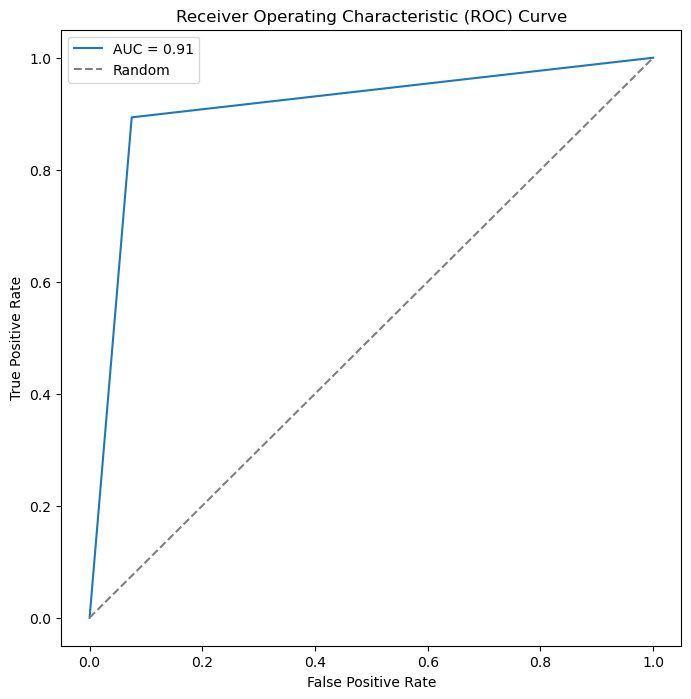

In [92]:
# check auc score and curve
auc = roc_auc_score(ys_test, cats_pred)
fpr, tpr, thresholds = roc_curve(ys_test, cats_pred)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [93]:
conf_matrix = confusion_matrix(ys_test, cats_pred)

# Extract values from confusion matrix
true_positive = conf_matrix[1, 1]
false_positive = conf_matrix[0, 1]
true_negative = conf_matrix[0, 0]
false_negative = conf_matrix[1, 0]

# Calculate sensitivity and specificity
sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)


print("Confusion Matrix:")
print(conf_matrix)
print("\nSensitivity (True Positive Rate): {:.8f}".format(sensitivity))
print("Specificity (True Negative Rate): {:.8f}".format(specificity))

Confusion Matrix:
[[125178  10110]
 [ 14427 121052]]

Sensitivity (True Positive Rate): 0.89351117
Specificity (True Negative Rate): 0.92527053


In [94]:
# to check if train score higher than test score above (Holdout validation)
cats_pred_train = cats_model.predict(xs_train)
cats_accuracy_train = accuracy_score(ys_train, cats_pred_train)
print(f"Accuracy: {cats_accuracy_train:.8f}")

Accuracy: 0.91157594


In [95]:
num_folds = 5

cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_results = cross_val_score(cats_model, X1_smote, y1_smote, cv=cv, scoring='accuracy')

# Print the results
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean():.8f}')
print(f'Standard Deviation: {cross_val_results.std():.2f}')

Learning rate set to 0.203578
0:	learn: 0.6641519	total: 124ms	remaining: 2m 3s
1:	learn: 0.6457347	total: 228ms	remaining: 1m 53s
2:	learn: 0.6331258	total: 313ms	remaining: 1m 43s
3:	learn: 0.6221854	total: 397ms	remaining: 1m 38s
4:	learn: 0.6125023	total: 485ms	remaining: 1m 36s
5:	learn: 0.6054978	total: 580ms	remaining: 1m 36s
6:	learn: 0.5982499	total: 672ms	remaining: 1m 35s
7:	learn: 0.5913212	total: 762ms	remaining: 1m 34s
8:	learn: 0.5863945	total: 862ms	remaining: 1m 34s
9:	learn: 0.5829572	total: 947ms	remaining: 1m 33s
10:	learn: 0.5784462	total: 1.03s	remaining: 1m 33s
11:	learn: 0.5660575	total: 1.13s	remaining: 1m 32s
12:	learn: 0.5612921	total: 1.21s	remaining: 1m 31s
13:	learn: 0.5591107	total: 1.3s	remaining: 1m 31s
14:	learn: 0.5567666	total: 1.39s	remaining: 1m 30s
15:	learn: 0.5525086	total: 1.46s	remaining: 1m 30s
16:	learn: 0.5460239	total: 1.56s	remaining: 1m 30s
17:	learn: 0.5387128	total: 1.65s	remaining: 1m 30s
18:	learn: 0.5320697	total: 1.74s	remaining: 1

#### AdaBoost with SMOTE

In [96]:
adas_model = AdaBoostClassifier()
adas_model.fit(xs_train, ys_train)

# Make predictions
adas_pred = adas_model.predict(xs_test)

# Evaluate accuracy
adas_accuracy = accuracy_score(ys_test, adas_pred)
print(f"Accuracy: {adas_accuracy:.8f}")

Accuracy: 0.68340677


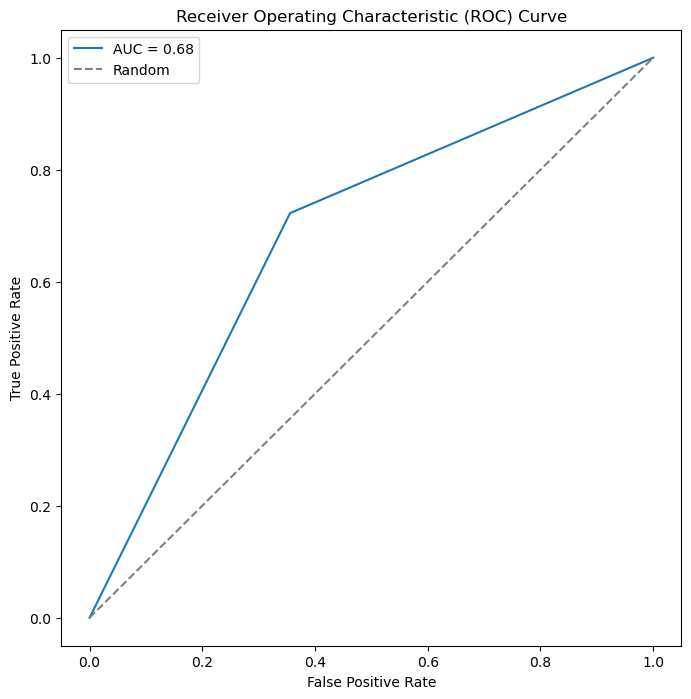

In [97]:
# check auc score and curve
auc = roc_auc_score(ys_test, adas_pred)
fpr, tpr, thresholds = roc_curve(ys_test, adas_pred)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [98]:
conf_matrix = confusion_matrix(ys_test, adas_pred)

# Extract values from confusion matrix
true_positive = conf_matrix[1, 1]
false_positive = conf_matrix[0, 1]
true_negative = conf_matrix[0, 0]
false_negative = conf_matrix[1, 0]

# Calculate sensitivity and specificity
sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)


print("Confusion Matrix:")
print(conf_matrix)
print("\nSensitivity (True Positive Rate): {:.8f}".format(sensitivity))
print("Specificity (True Negative Rate): {:.8f}".format(specificity))

Confusion Matrix:
[[87166 48122]
 [37601 97878]]

Sensitivity (True Positive Rate): 0.72245883
Specificity (True Negative Rate): 0.64429957


In [99]:
# to check if train score higher than test score above (Holdout validation)
adas_pred_train = adas_model.predict(xs_train)
adas_accuracy_train = accuracy_score(ys_train, adas_pred_train)
print(f"Accuracy: {adas_accuracy_train:.8f}")

Accuracy: 0.68353054


In [100]:
num_folds = 5

cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_results = cross_val_score(adas_model, X1_smote, y1_smote, cv=cv, scoring='accuracy')

# Print the results
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean():.8f}')
print(f'Standard Deviation: {cross_val_results.std():.2f}')

Cross-Validation Results (Accuracy): [0.68432638 0.68406785 0.67957203 0.67809843 0.68197632]
Mean Accuracy: 0.68160820
Standard Deviation: 0.00


### Machine learning ADASYN resampled data

In [101]:
X1_adasyn = df_adasyn.drop('loan_condition', axis=1)
y1_adasyn = df_adasyn['loan_condition']

In [102]:
#test size 0.2
xa_train, xa_test, ya_train, ya_test = train_test_split(X1_adasyn, y1_adasyn, test_size=0.2, random_state=40 )

#### GBDT with ADASYN

In [103]:
gbdta_model = GradientBoostingClassifier()
gbdta_model.fit(xa_train, ya_train)

# Make predictions
gbdta_pred = gbdta_model.predict(xa_test)

# Evaluate accuracy
gbdta_accuracy = accuracy_score(ya_test, gbdta_pred)
print(f"Accuracy: {gbdta_accuracy:.8f}")

Accuracy: 0.75623006


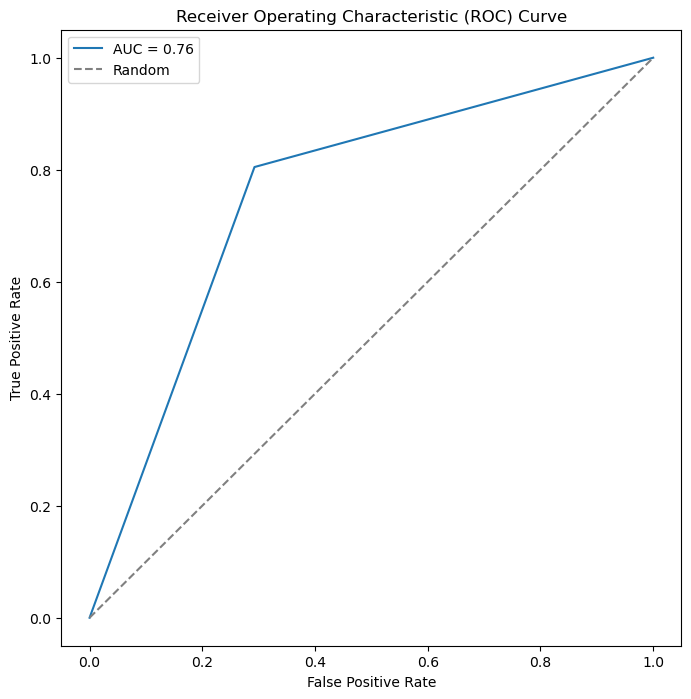

In [104]:
# check auc score and curve
auc = roc_auc_score(ya_test, gbdta_pred)
fpr, tpr, thresholds = roc_curve(ya_test, gbdta_pred)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [105]:
conf_matrix = confusion_matrix(ya_test, gbdta_pred)

# Extract values from confusion matrix
true_positive = conf_matrix[1, 1]
false_positive = conf_matrix[0, 1]
true_negative = conf_matrix[0, 0]
false_negative = conf_matrix[1, 0]

# Calculate sensitivity and specificity
sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)


print("Confusion Matrix:")
print(conf_matrix)
print("\nSensitivity (True Positive Rate): {:.8f}".format(sensitivity))
print("Specificity (True Negative Rate): {:.8f}".format(specificity))

Confusion Matrix:
[[ 95796  39619]
 [ 26566 109525]]

Sensitivity (True Positive Rate): 0.80479238
Specificity (True Negative Rate): 0.70742532


In [106]:
# to check if train score higher than test score above (Holdout validation)
gbdta_pred_train = gbdta_model.predict(xa_train)
gbdta_accuracy_train = accuracy_score(ya_train, gbdta_pred_train)
print(f"Accuracy: {gbdta_accuracy_train:.8f}")

Accuracy: 0.75693310


In [107]:
num_folds = 5

cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_results = cross_val_score(gbdta_model, X1_adasyn, y1_adasyn, cv=cv, scoring='accuracy')

# Print the results
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean():.8f}')
print(f'Standard Deviation: {cross_val_results.std():.2f}')

Cross-Validation Results (Accuracy): [0.75877513 0.75817477 0.76294078 0.76228799 0.75871163]
Mean Accuracy: 0.76017806
Standard Deviation: 0.00


#### LightGBM with ADASYN

In [108]:
lgba_model = lgb.LGBMClassifier()
lgba_model.fit(xa_train, ya_train)

# Make predictions
lgba_pred = lgba_model.predict(xa_test)

# Evaluate accuracy
lgba_accuracy = accuracy_score(ya_test, lgba_pred)
print(f"Accuracy: {lgba_accuracy:.8f}")

[LightGBM] [Info] Number of positive: 544521, number of negative: 541501
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1288
[LightGBM] [Info] Number of data points in the train set: 1086022, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501390 -> initscore=0.005562
[LightGBM] [Info] Start training from score 0.005562
Accuracy: 0.86957931


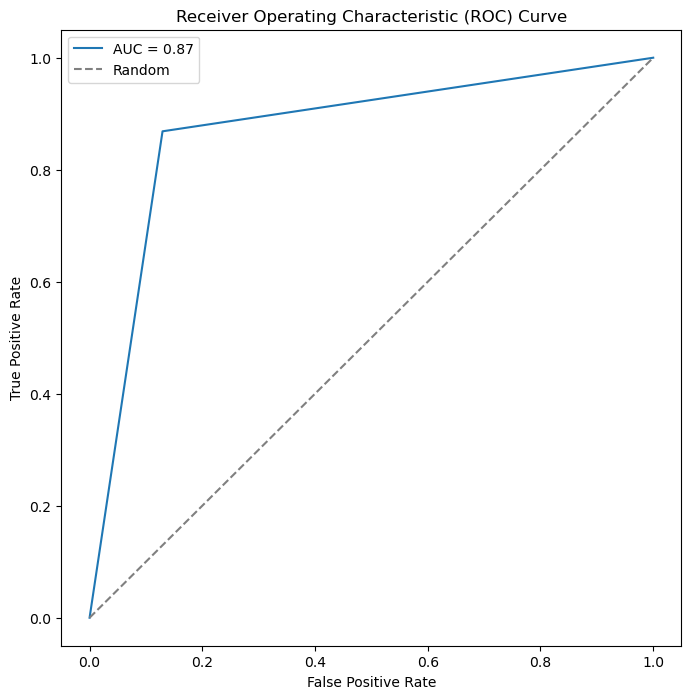

In [109]:
# check auc score and curve
auc = roc_auc_score(ya_test, lgba_pred)
fpr, tpr, thresholds = roc_curve(ya_test, lgba_pred)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [110]:
conf_matrix = confusion_matrix(ya_test, lgba_pred)

# Extract values from confusion matrix
true_positive = conf_matrix[1, 1]
false_positive = conf_matrix[0, 1]
true_negative = conf_matrix[0, 0]
false_negative = conf_matrix[1, 0]

# Calculate sensitivity and specificity
sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)


print("Confusion Matrix:")
print(conf_matrix)
print("\nSensitivity (True Positive Rate): {:.8f}".format(sensitivity))
print("Specificity (True Negative Rate): {:.8f}".format(specificity))

Confusion Matrix:
[[117888  17527]
 [ 17883 118208]]

Sensitivity (True Positive Rate): 0.86859528
Specificity (True Negative Rate): 0.87056825


In [111]:
# to check if train score higher than test score above (Holdout validation)
lgba_pred_train = lgba_model.predict(xa_train)
lgba_accuracy_train = accuracy_score(ya_train, lgba_pred_train)
print(f"Accuracy: {lgba_accuracy_train:.8f}")

Accuracy: 0.87047316


In [112]:
num_folds = 5

cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_results = cross_val_score(lgba_model, X1_adasyn, y1_adasyn, cv=cv, scoring='accuracy')

# Print the results
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean():.8f}')
print(f'Standard Deviation: {cross_val_results.std():.2f}')

[LightGBM] [Info] Number of positive: 544490, number of negative: 541532
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071745 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1288
[LightGBM] [Info] Number of data points in the train set: 1086022, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501362 -> initscore=0.005447
[LightGBM] [Info] Start training from score 0.005447
[LightGBM] [Info] Number of positive: 544489, number of negative: 541533
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.053846 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1288
[LightGBM] [Info] Number of data points in the train set: 1086022, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501361 -> initscore=0.005444
[LightGBM] [Info] Start training from score 0.005444
[LightGBM]

#### XGBoost with ADASYN

In [113]:
xgba_model = xgb.XGBClassifier()
xgba_model.fit(xa_train, ya_train)

# Make predictions
xgba_pred = xgba_model.predict(xa_test)

# Evaluate accuracy
xgba_accuracy = accuracy_score(ya_test, xgba_pred)
print(f"Accuracy: {xgba_accuracy:.8f}")

Accuracy: 0.84890205


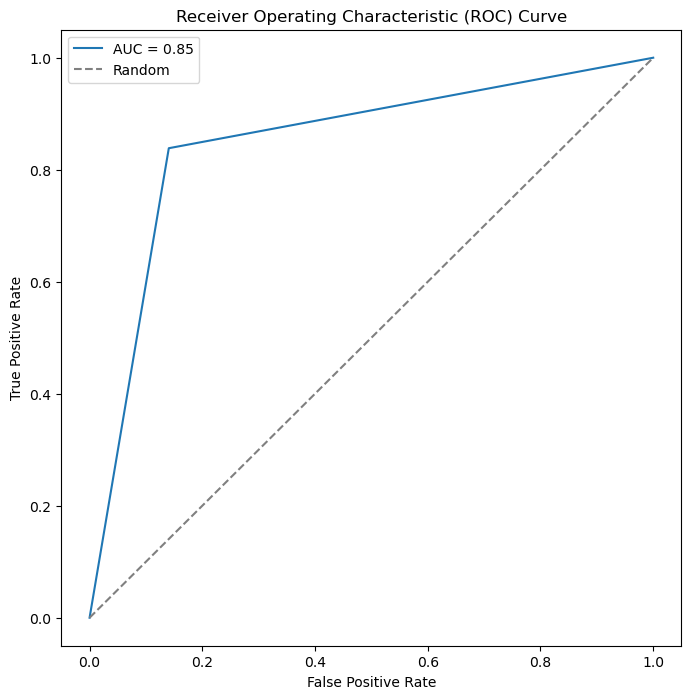

In [114]:
# check auc score and curve
auc = roc_auc_score(ya_test, xgba_pred)
fpr, tpr, thresholds = roc_curve(ya_test, xgba_pred)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [115]:
conf_matrix = confusion_matrix(ya_test, xgba_pred)

# Extract values from confusion matrix
true_positive = conf_matrix[1, 1]
false_positive = conf_matrix[0, 1]
true_negative = conf_matrix[0, 0]
false_negative = conf_matrix[1, 0]

# Calculate sensitivity and specificity
sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)


print("Confusion Matrix:")
print(conf_matrix)
print("\nSensitivity (True Positive Rate): {:.8f}".format(sensitivity))
print("Specificity (True Negative Rate): {:.8f}".format(specificity))

Confusion Matrix:
[[116381  19034]
 [ 21990 114101]]

Sensitivity (True Positive Rate): 0.83841694
Specificity (True Negative Rate): 0.85943950


In [116]:
# to check if train score higher than test score above (Holdout validation)
xgba_pred_train = xgba_model.predict(xa_train)
xgba_accuracy_train = accuracy_score(ya_train, xgba_pred_train)
print(f"Accuracy: {xgba_accuracy_train:.8f}")

Accuracy: 0.85203523


In [117]:
num_folds = 5

cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_results = cross_val_score(xgba_model, X1_adasyn, y1_adasyn, cv=cv, scoring='accuracy')

# Print the results
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean():.8f}')
print(f'Standard Deviation: {cross_val_results.std():.2f}')

Cross-Validation Results (Accuracy): [0.84977496 0.85352442 0.85155393 0.84868787 0.85210585]
Mean Accuracy: 0.85112940
Standard Deviation: 0.00


#### CatBoost with ADASYN

In [118]:
cata_model = CatBoostClassifier()
cata_model.fit(xa_train, ya_train)

# Make predictions
cata_pred = cata_model.predict(xa_test)

# Evaluate accuracy
cata_accuracy = accuracy_score(ya_test, cata_pred)
print(f"Accuracy: {cata_accuracy:.8f}")

Learning rate set to 0.203815
0:	learn: 0.6665542	total: 156ms	remaining: 2m 36s
1:	learn: 0.6480435	total: 304ms	remaining: 2m 31s
2:	learn: 0.6328911	total: 459ms	remaining: 2m 32s
3:	learn: 0.6238546	total: 594ms	remaining: 2m 27s
4:	learn: 0.6151040	total: 734ms	remaining: 2m 26s
5:	learn: 0.6091975	total: 886ms	remaining: 2m 26s
6:	learn: 0.6022387	total: 1.01s	remaining: 2m 23s
7:	learn: 0.5976163	total: 1.15s	remaining: 2m 22s
8:	learn: 0.5916150	total: 1.26s	remaining: 2m 19s
9:	learn: 0.5783608	total: 1.4s	remaining: 2m 18s
10:	learn: 0.5752569	total: 1.54s	remaining: 2m 18s
11:	learn: 0.5718321	total: 1.67s	remaining: 2m 17s
12:	learn: 0.5687030	total: 1.8s	remaining: 2m 17s
13:	learn: 0.5646530	total: 1.93s	remaining: 2m 16s
14:	learn: 0.5562801	total: 2.07s	remaining: 2m 16s
15:	learn: 0.5478067	total: 2.2s	remaining: 2m 15s
16:	learn: 0.5426664	total: 2.35s	remaining: 2m 15s
17:	learn: 0.5392174	total: 2.46s	remaining: 2m 14s
18:	learn: 0.5354071	total: 2.59s	remaining: 2m

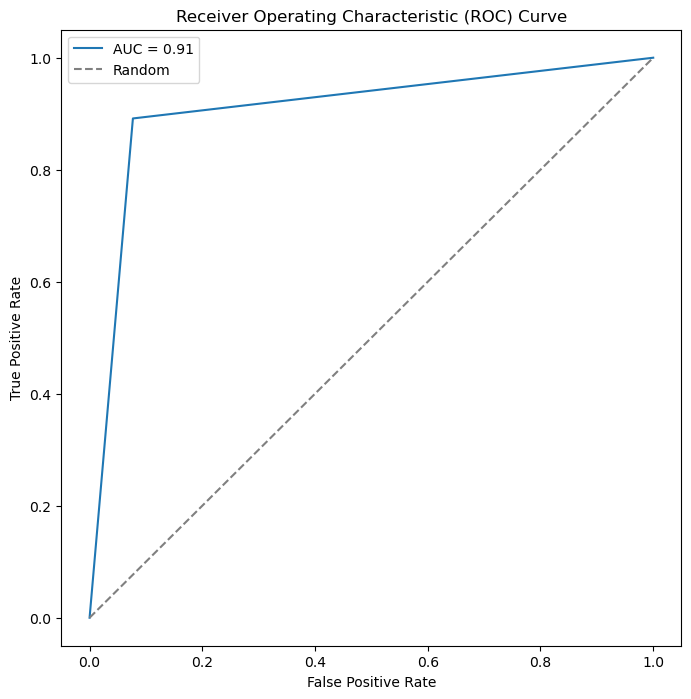

In [119]:
# check auc score and curve
auc = roc_auc_score(ya_test, cata_pred)
fpr, tpr, thresholds = roc_curve(ya_test, cata_pred)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [120]:
conf_matrix = confusion_matrix(ya_test, cata_pred)

# Extract values from confusion matrix
true_positive = conf_matrix[1, 1]
false_positive = conf_matrix[0, 1]
true_negative = conf_matrix[0, 0]
false_negative = conf_matrix[1, 0]

# Calculate sensitivity and specificity
sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)


print("Confusion Matrix:")
print(conf_matrix)
print("\nSensitivity (True Positive Rate): {:.8f}".format(sensitivity))
print("Specificity (True Negative Rate): {:.8f}".format(specificity))

Confusion Matrix:
[[125007  10408]
 [ 14758 121333]]

Sensitivity (True Positive Rate): 0.89155785
Specificity (True Negative Rate): 0.92313998


In [121]:
# to check if train score higher than test score above (Holdout validation)
cata_pred_train = cata_model.predict(xa_train)
cata_accuracy_train = accuracy_score(ya_train, cata_pred_train)
print(f"Accuracy: {cata_accuracy_train:.8f}")

Accuracy: 0.90976794


In [122]:
num_folds = 5

cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_results = cross_val_score(cata_model, X1_adasyn, y1_adasyn, cv=cv, scoring='accuracy')

# Print the results
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean():.8f}')
print(f'Standard Deviation: {cross_val_results.std():.2f}')

Learning rate set to 0.203815
0:	learn: 0.6665734	total: 118ms	remaining: 1m 58s
1:	learn: 0.6493894	total: 244ms	remaining: 2m 1s
2:	learn: 0.6361970	total: 364ms	remaining: 2m
3:	learn: 0.6255512	total: 486ms	remaining: 2m 1s
4:	learn: 0.6166724	total: 600ms	remaining: 1m 59s
5:	learn: 0.6099839	total: 728ms	remaining: 2m
6:	learn: 0.6041245	total: 916ms	remaining: 2m 9s
7:	learn: 0.6007236	total: 1.05s	remaining: 2m 9s
8:	learn: 0.5959503	total: 1.17s	remaining: 2m 9s
9:	learn: 0.5904925	total: 1.28s	remaining: 2m 6s
10:	learn: 0.5855720	total: 1.4s	remaining: 2m 5s
11:	learn: 0.5827764	total: 1.5s	remaining: 2m 3s
12:	learn: 0.5672064	total: 1.62s	remaining: 2m 2s
13:	learn: 0.5649825	total: 1.73s	remaining: 2m 2s
14:	learn: 0.5600140	total: 1.85s	remaining: 2m 1s
15:	learn: 0.5549820	total: 1.98s	remaining: 2m 1s
16:	learn: 0.5485420	total: 2.1s	remaining: 2m 1s
17:	learn: 0.5456299	total: 2.22s	remaining: 2m 1s
18:	learn: 0.5433010	total: 2.36s	remaining: 2m 2s
19:	learn: 0.53604

#### AdaBoost with ADASYN

In [123]:
adaa_model = AdaBoostClassifier()
adaa_model.fit(xa_train, ya_train)

# Make predictions
adaa_pred = adaa_model.predict(xa_test)

# Evaluate accuracy
adaa_accuracy = accuracy_score(ya_test, adaa_pred)
print(f"Accuracy: {adaa_accuracy:.8f}")

Accuracy: 0.67606609


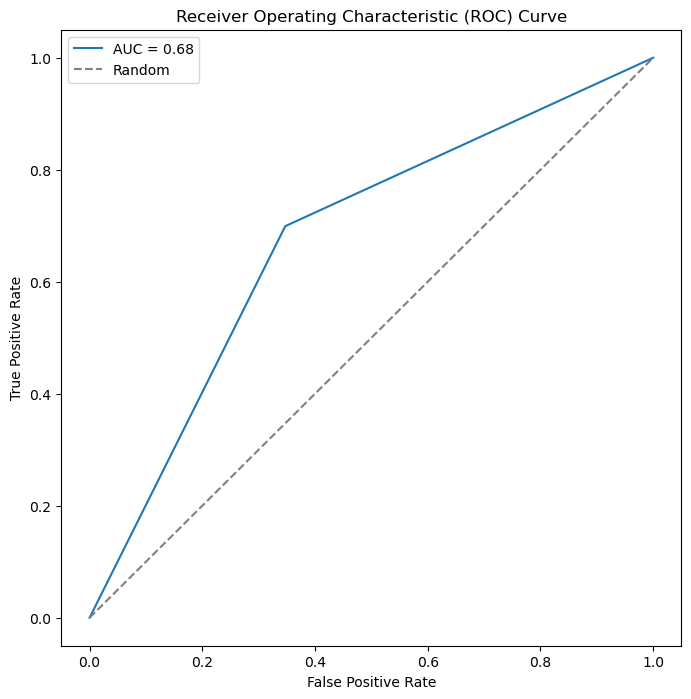

In [124]:
# check auc score and curve
auc = roc_auc_score(ya_test, adaa_pred)
fpr, tpr, thresholds = roc_curve(ya_test, adaa_pred)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [125]:
conf_matrix = confusion_matrix(ya_test, adaa_pred)

# Extract values from confusion matrix
true_positive = conf_matrix[1, 1]
false_positive = conf_matrix[0, 1]
true_negative = conf_matrix[0, 0]
false_negative = conf_matrix[1, 0]

# Calculate sensitivity and specificity
sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)


print("Confusion Matrix:")
print(conf_matrix)
print("\nSensitivity (True Positive Rate): {:.8f}".format(sensitivity))
print("Specificity (True Negative Rate): {:.8f}".format(specificity))

Confusion Matrix:
[[88396 47019]
 [40931 95160]]

Sensitivity (True Positive Rate): 0.69923801
Specificity (True Negative Rate): 0.65277850


In [126]:
# to check if train score higher than test score above (Holdout validation)
adaa_pred_train = adaa_model.predict(xa_train)
adaa_accuracy_train = accuracy_score(ya_train, adaa_pred_train)
print(f"Accuracy: {adaa_accuracy_train:.8f}")

Accuracy: 0.67616402


In [127]:
num_folds = 5

cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_results = cross_val_score(adaa_model, X1_adasyn, y1_adasyn, cv=cv, scoring='accuracy')

# Print the results
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean():.8f}')
print(f'Standard Deviation: {cross_val_results.std():.2f}')

Cross-Validation Results (Accuracy): [0.67604767 0.67334055 0.67548783 0.67611278 0.67473896]
Mean Accuracy: 0.67514556
Standard Deviation: 0.00
